In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [5]:
dataframe = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx",index_col=0, parse_dates=['Month'])
dataframe

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [6]:
dataframe.shape

(96, 1)

In [7]:
dataframe.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [9]:
dataframe.isna().sum()

Passengers    0
dtype: int64

In [10]:
dataframe.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

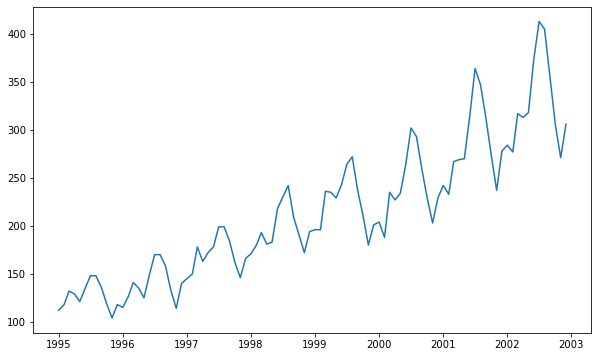

In [11]:
plt.figure(figsize = (10,6))
plt.plot(dataframe)

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

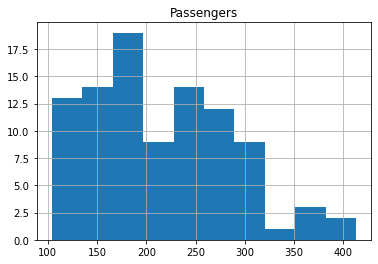

In [12]:
# create a histogram plot
dataframe.hist()

<AxesSubplot:ylabel='Density'>

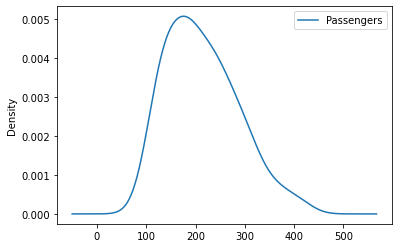

In [13]:
# create a density plot
dataframe.plot(kind='kde')

#### Box and Whisker Plots by Interval

In [14]:
dataframe = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
dataframe

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [15]:
type(dataframe)

pandas.core.series.Series

In [16]:
# Grouping by Year
groups = dataframe.groupby(pd.Grouper(freq='A'))
groups

In [17]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

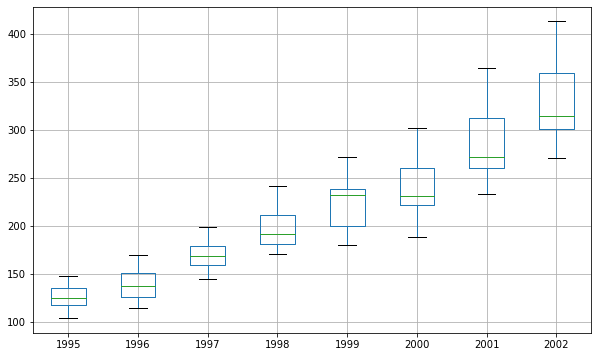

In [18]:
plt.figure(figsize = (10,6))
years.boxplot()

#### Lag plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

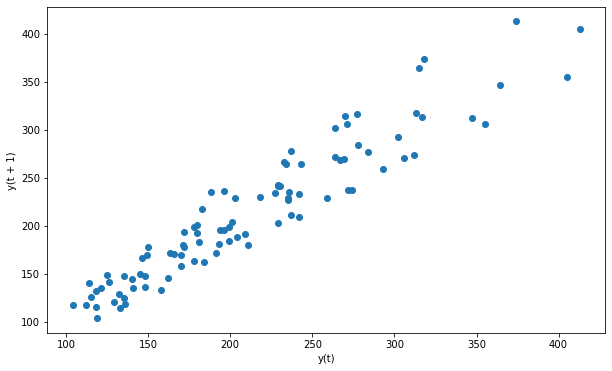

In [19]:
# create a scatter plot
plt.figure(figsize = (10,6))
pd.plotting.lag_plot(dataframe)

<Figure size 2880x720 with 0 Axes>

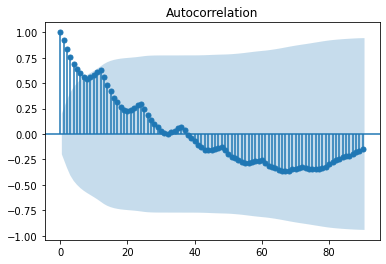

In [20]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(dataframe, lags=90)
plt.show()

### Sampling and Basic Transformations

#### Upsampling Data

In [21]:
dataframe = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                     squeeze=True)
dataframe

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [22]:
dataframe.shape

(96,)

In [23]:
upsampled = dataframe.resample('D').mean()
upsampled.head(10)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
Freq: D, Name: Passengers, dtype: float64

In [24]:
upsampled.shape

(2892,)

#### interpolate the missing value

In [25]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(10)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
Freq: D, Name: Passengers, dtype: float64

<AxesSubplot:xlabel='Month'>

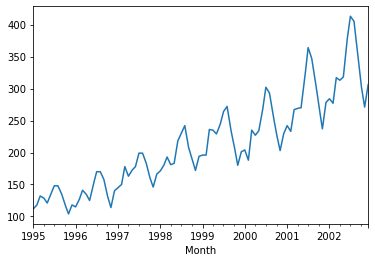

In [26]:
interpolated.plot()

<AxesSubplot:xlabel='Month'>

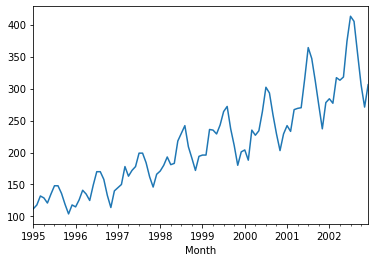

In [27]:
dataframe.plot()

#### Downsampling Data

In [28]:
# downsample to quarterly intervals
resample = dataframe.resample('Q')
quarterly_mean_sales = resample.mean()

<AxesSubplot:xlabel='Month'>

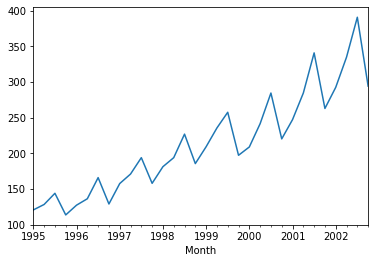

In [29]:
quarterly_mean_sales.plot()

### Tranformations

In [30]:
# load and plot a time series
dataframe = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx",
                          index_col=0,
                          header=0, 
                          parse_dates=True)
dataframe

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


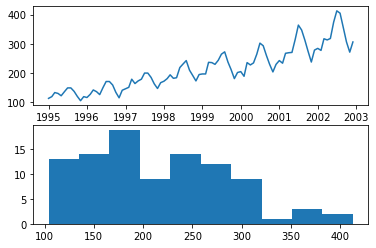

In [31]:
# line plot
plt.subplot(211)
plt.plot(dataframe)

# histogram
plt.subplot(212)
plt.hist(dataframe)

plt.show()

#### Square Root Transform

In [32]:
data = pd.DataFrame(np.sqrt(dataframe.values), columns = ['Passengers'])
data

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


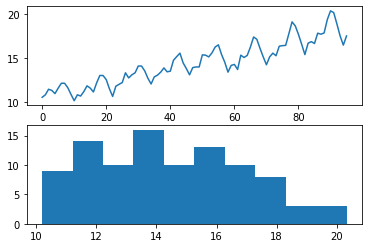

In [33]:
# line plot
plt.subplot(211)
plt.plot(data['Passengers'])

# histogram
plt.subplot(212)
plt.hist(data['Passengers'])
plt.show()

#### Log Transform

In [34]:
data = pd.DataFrame(np.log(dataframe.values), columns = ['Passengers'])
data

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


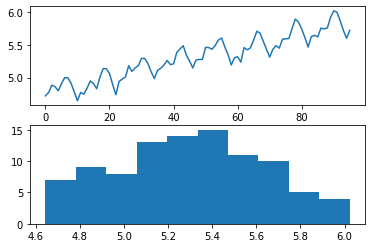

In [35]:
# line plot
plt.subplot(211)
plt.plot(data['Passengers'])

# histogram
plt.subplot(212)
plt.hist(data['Passengers'])
plt.show()

In [36]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

### Forecasting - Model Based Methods

In [37]:
dataframe = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx")
dataframe

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<AxesSubplot:>

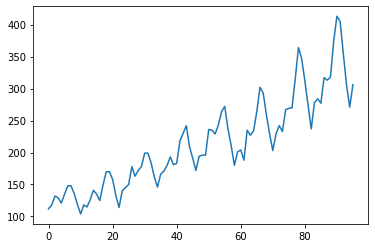

In [38]:
dataframe['Passengers'].plot()

In [39]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

dataframe["month"] = dataframe['Month'].dt.strftime("%b") # month extraction
dataframe["year"] = dataframe['Month'].dt.strftime("%Y") # year extraction
#Airlines["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Airlines["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

In [40]:
dataframe

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [41]:
heatmap_y_month = pd.pivot_table(data = dataframe,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

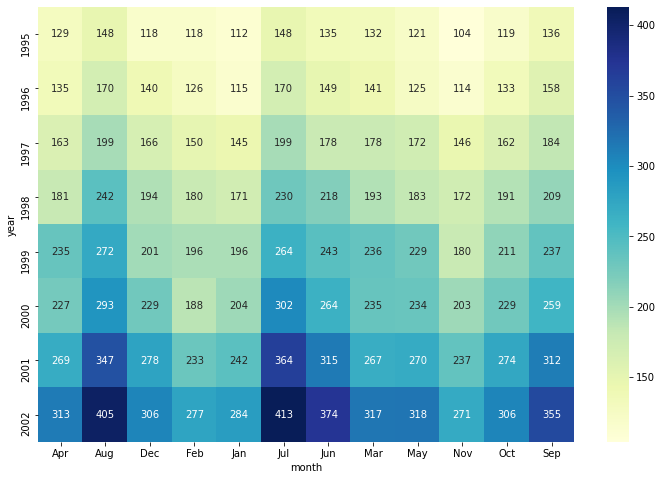

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

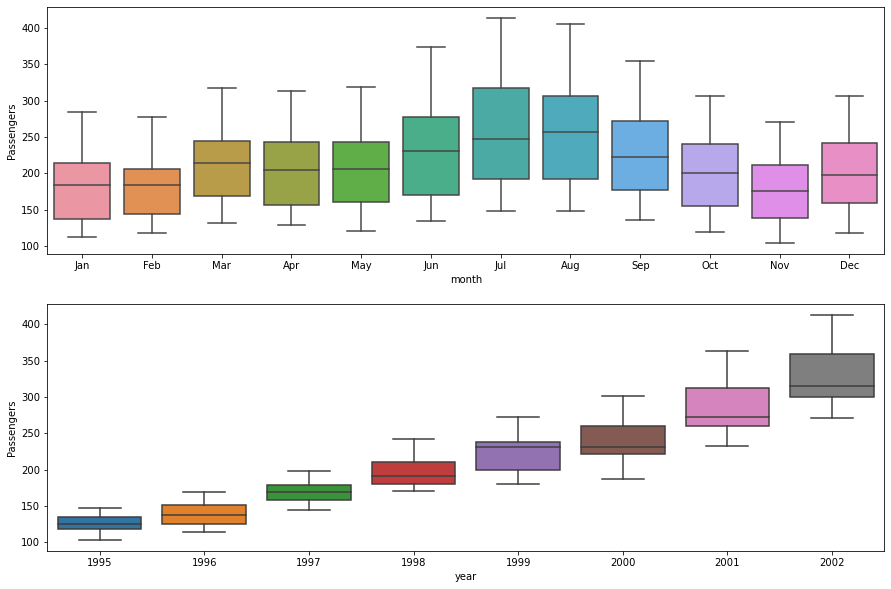

In [43]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=dataframe)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=dataframe)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

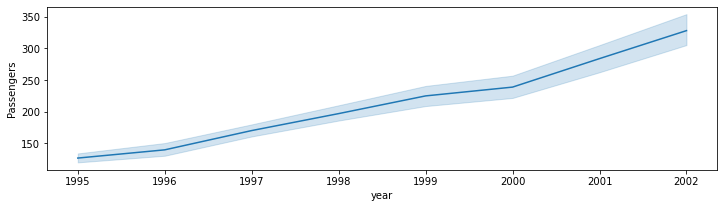

In [44]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=dataframe)

### Splitting data

In [45]:
dataframe

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [46]:
dataframe.shape

(96, 4)

In [47]:
# Complete the dataset
dataframe['t']=np.arange(1,97)
dataframe['t_square']=np.square(dataframe.t)
dataframe['log_Passengers']=np.log(dataframe.Passengers)
dataframe2=pd.get_dummies(dataframe['month'])

In [48]:
dataframe

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [49]:
dataframe2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
dataframe = pd.concat([dataframe,dataframe2],axis=1)
dataframe

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
# For self understanding of forecasting values data split into multiples of 12
Train = dataframe.head(84)
Test = dataframe.tail(12)

In [52]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.199236534802715

In [54]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.0573611031562

In [55]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.051888979330975

In [56]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.8197848142182

In [57]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612086503

In [58]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708638

In [59]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323617

In [60]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.7312105213405

In [66]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [67]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=dataframe).fit()

In [68]:
pred_new  = pd.Series(model_full.predict(dataframe))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [69]:
dataframe["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

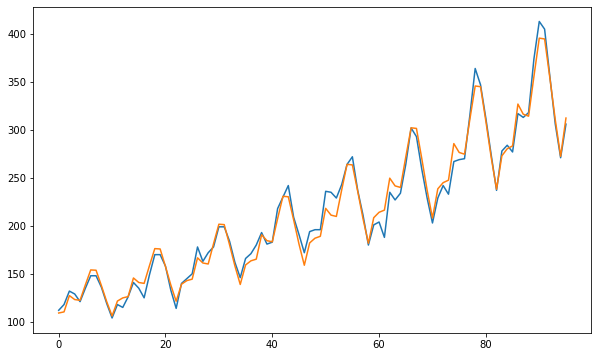

In [70]:
plt.figure(figsize=(10,6))
plt.plot(dataframe[['Passengers','forecasted_Passengers']].reset_index(drop=True))

### Splitting data

In [71]:
dataframe = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx")
Train = dataframe.head(84)
Test = dataframe.tail(12)

In [72]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [73]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


## Moving Average

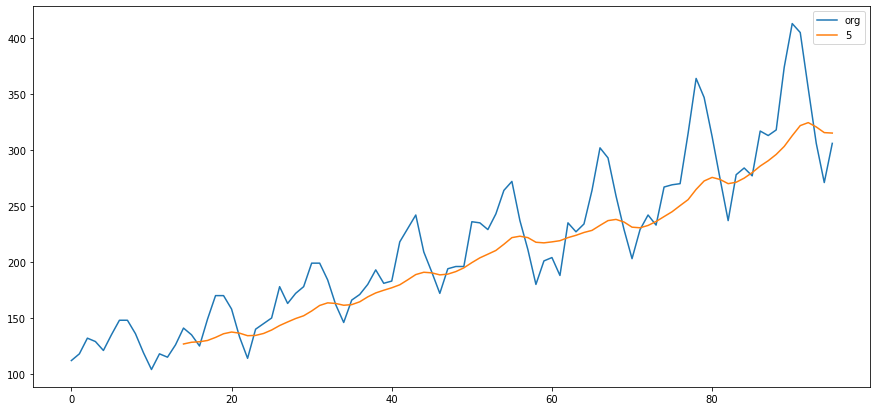

In [74]:
plt.figure(figsize=(15,7))
dataframe['Passengers'].plot(label="org")
dataframe["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

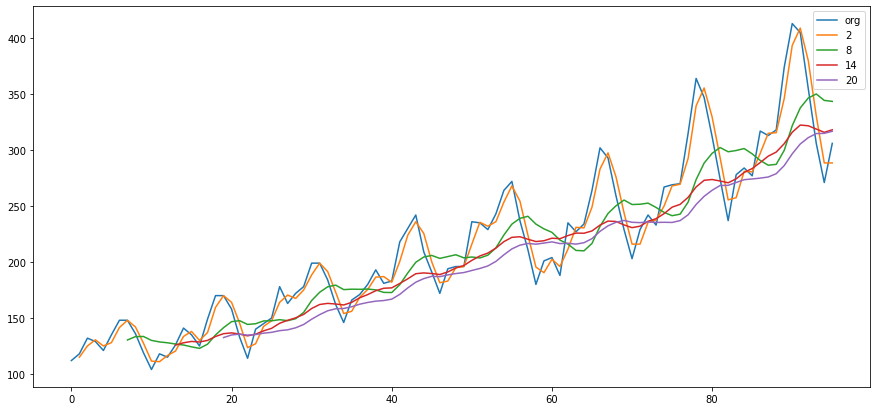

In [75]:
plt.figure(figsize=(15,7))
dataframe['Passengers'].plot(label="org")
for i in range(2,24,6):
    dataframe["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

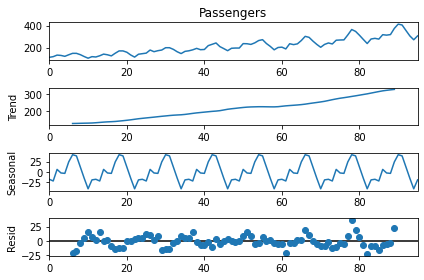

In [76]:
decompose_ts_add = seasonal_decompose(dataframe['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

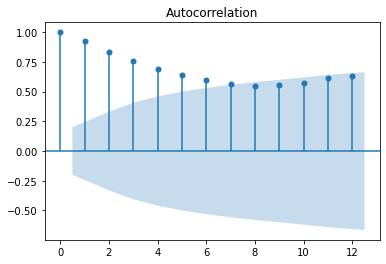

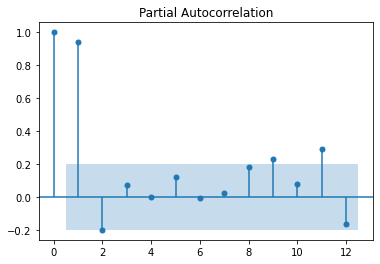

In [77]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(dataframe.Passengers,lags=12)
tsa_plots.plot_pacf(dataframe.Passengers,lags=12)
plt.show()

## Evaluation Metric MAPE

In [78]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [79]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\Ashwini\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

### Holt method

In [80]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

<ipython-input-80-31e8e28b1106>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.53071965210049

### Holts winter exponential smoothing with additive seasonality and additive trend

In [81]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.495938663841666

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [82]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.821237608921072

## Final Model by combining train and test

In [83]:
hwe_model_mul_add = ExponentialSmoothing(dataframe["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [84]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
101    392.472018
102    436.501550
103    429.860620
104    380.172862
105    332.318642
106    290.626602
107    330.591802
dtype: float64

## Forecasting using Auto ARIMA model

In [95]:
pip install pmdarima

In [96]:
import statsmodels.tsa.seasonal
# !pip install pmdarima
from pmdarima import auto_arima

In [97]:
data = pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<AxesSubplot:xlabel='Month'>

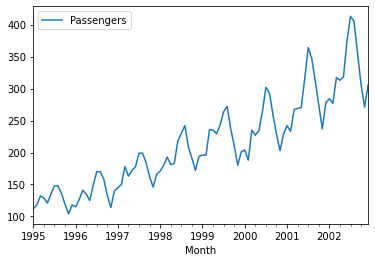

In [98]:
data.plot()

In [99]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

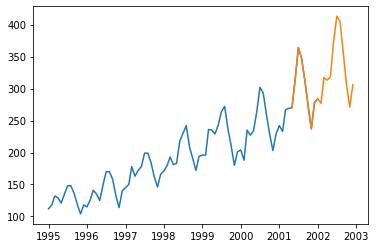

In [100]:
train = data[:85]
test = data[-20:]
plt.plot(train)
plt.plot(test)

In [101]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                        max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5,
                        max_Q=5, m=12, seasonal=True,
                        error_action='warn',trace=True,
                        suppress_warnings=True,stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=543.172, Time=3.59 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=537.489, Time=1.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=537.888, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=540.215, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=539.489, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=539.489, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=537.948, Time=0.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=539.745, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=539.466, Time=0.27 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=539.078, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=537.388, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=540.192, Time=0.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.385, Time=0.25 sec
 ARIMA(0,1,1)(1,1,1)[12]             

In [102]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -265.694
Date:                             Sat, 01 Oct 2022   AIC                            537.388
Time:                                     00:45:02   BIC                            544.218
Sample:                                 01-01-1995   HQIC                           540.108
                                      - 01-01-2002                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2607      0.105     -2.472      0.013      -0.467      -0.054
ar.S.L12      -0.2625      0.098     -2.683      0.007      -0.454      -0.071
sigma2        92.7245     16.167      5.735      0.000      61.038     124.411
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.99   Prob(JB):                         0.27
Heteroskedasticity (H):               2.60   Skew:                             0.45
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_pass']
prediction

,predicted_pass
Month,
2001-05-01,NaN
2001-06-01,NaN
2001-07-01,NaN
2001-08-01,NaN
2001-09-01,NaN
2001-10-01,NaN
2001-11-01,NaN
2001-12-01,NaN
2002-01-01,NaN


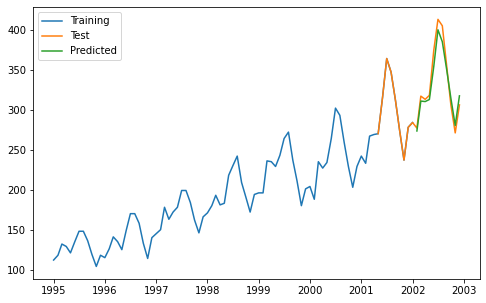

In [104]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper left')
plt.show()

#### Persistence/ Base model

In [105]:
# evaluate a persistence model and load data
train = pd.read_csv('dataset.csv',
                    header=None,
                    index_col=0,
                    parse_dates=True,
                    squeeze=True)
train


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [106]:
# prepare data
X = train.values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278], dtype=int64)

In [107]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278.], dtype=float32)

In [108]:
train_size = int(len(X) * 0.50)
train_size

42

In [109]:
train, test = X[0:train_size], X[train_size:]

In [110]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218.],
      dtype=float32)

In [111]:
test

array([230., 242., 209., 191., 172., 194., 196., 196., 236., 235., 229.,
       243., 264., 272., 237., 211., 180., 201., 204., 188., 235., 227.,
       234., 264., 302., 293., 259., 229., 203., 229., 242., 233., 267.,
       269., 270., 315., 364., 347., 312., 274., 237., 278.],
      dtype=float32)

In [112]:
# walk-forward validation
history = [x for x in train]
import warnings
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0]

### Prediction

In [101]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [102]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 26.029


### Build Model based on the optimized values

In [108]:
# save finalized model to file
# load data
train = pd.read_csv('dataset.csv',
                    header=0,
                    index_col=0,
                    parse_dates=True)
train

,112
1995-01-01,
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [109]:
# prepare data
X = train.values
X = X.astype('float32')

In [110]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

array([285.42374404, 286.31695954, 301.74727499, 309.57890687,
       322.47971234, 325.55138855, 328.29478114, 322.59241324,
       316.87077509, 307.51766393, 301.28117329, 295.99168233])

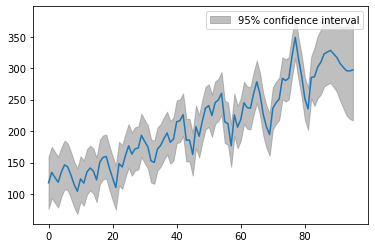

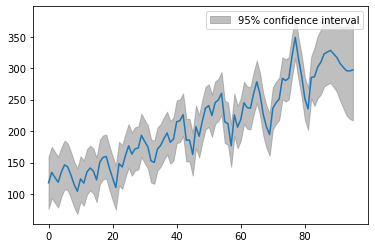

In [111]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [112]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

39.93720016664845

#### Combine train and test data and build final model

In [113]:
# fit model
Airlines=pd.read_excel("C:/Users/Ashwini/Downloads/Airlines+Data.xlsx",
                       header=0,
                       index_col=0,
                       parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [114]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

In [115]:
forecast = model_fit.forecast(steps=12)
forecast

array([285.42374404, 286.31695954, 301.74727499, 309.57890687,
       322.47971234, 325.55138855, 328.29478114, 322.59241324,
       316.87077509, 307.51766393, 301.28117329, 295.99168233])

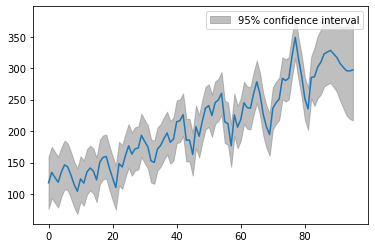

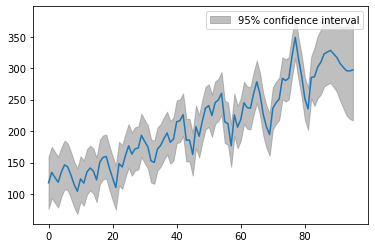

In [116]:
#model_fit.plot_predict(1,90)
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)